In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
data = DataProcessor("datasets/airy_equation-5.mat")
data.generateDataset(valRatio = 0.95, batch_size = 128)

Metal device set to: Apple M1 Pro


In [3]:
model = Model(activation = 'rational')

In [4]:
lossHistory = model.train(data, epochs = 3000)

Loss at epoch 99: Training = 3.194E-01, Validation = 4.168E-01
Loss at epoch 199: Training = 3.774E-02, Validation = 3.629E-02
Loss at epoch 299: Training = 1.152E-02, Validation = 1.179E-02
Loss at epoch 399: Training = 6.831E-03, Validation = 6.722E-03
Loss at epoch 499: Training = 1.907E-02, Validation = 2.082E-02
Loss at epoch 599: Training = 2.919E-03, Validation = 2.898E-03
Loss at epoch 699: Training = 2.153E-03, Validation = 2.254E-03
Loss at epoch 799: Training = 1.552E-03, Validation = 1.705E-03
Loss at epoch 899: Training = 1.270E-03, Validation = 1.474E-03
Loss at epoch 999: Training = 1.004E-03, Validation = 1.246E-03
Loss at epoch 1099: Training = 6.313E-03, Validation = 5.113E-03
Loss at epoch 1199: Training = 7.689E-04, Validation = 1.049E-03
Loss at epoch 1299: Training = 6.616E-04, Validation = 9.356E-04
Loss at epoch 1399: Training = 5.780E-04, Validation = 8.421E-04
Loss at epoch 1499: Training = 5.087E-04, Validation = 7.719E-04
Loss at epoch 1599: Training = 4.854

In [5]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

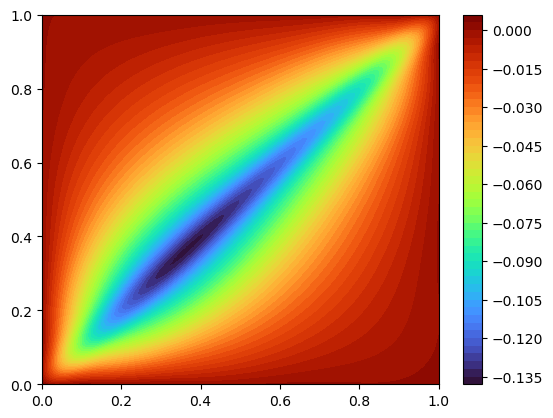

In [6]:
plt.figure()
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

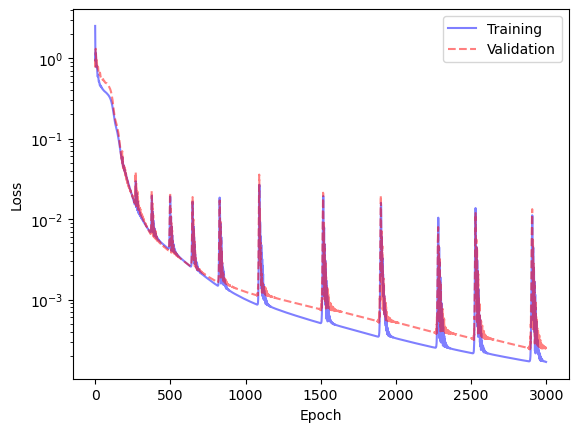

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [8]:
model.saveModels('savedModels/airy-theta-5')

INFO:tensorflow:Assets written to: savedModels/airy-theta-5/G/assets
INFO:tensorflow:Assets written to: savedModels/airy-theta-5/N/assets
